# K Nearest Neighbors Project 

In this project we will be exploring a dataset with only numeric values given along with TARGET CLASS

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Fetching the Data

In [2]:
df = pd.read_csv("KNN_Project_Data")

**Checking the head of the dataframe.**

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


____

***Since this data is artificial, we'll just do a large pairplot with seaborn to analyze all the data at once!!***
(With hue indicated by the TARGET CLASS column)


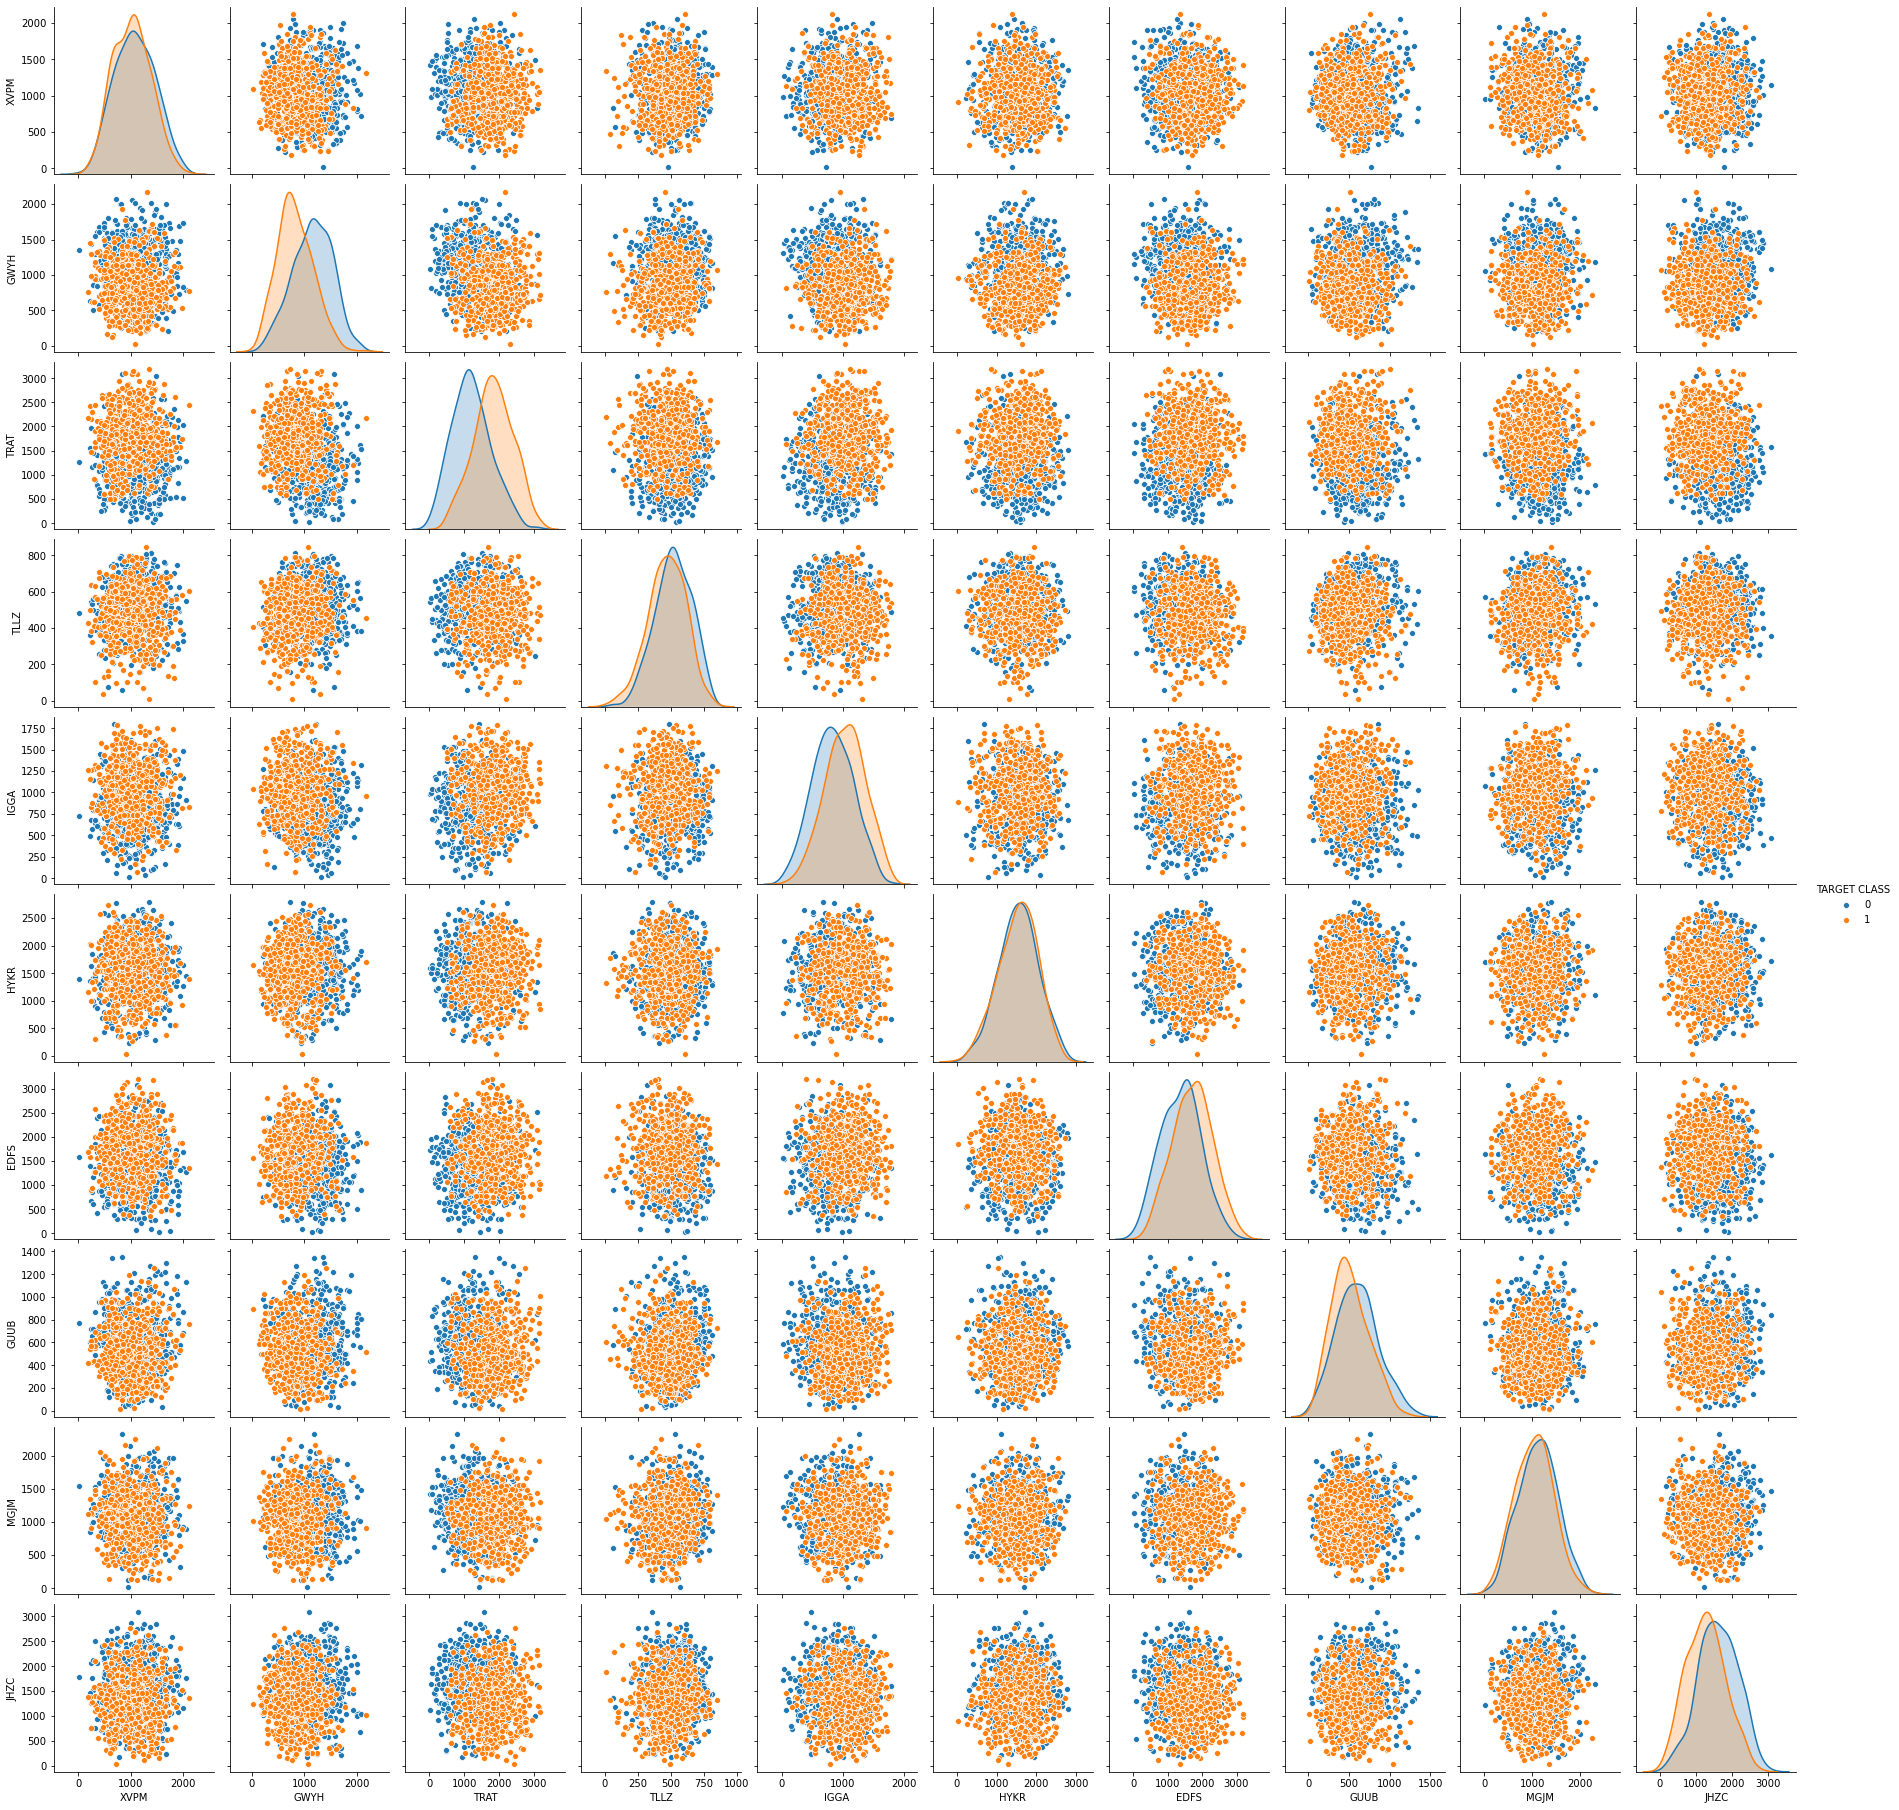

In [4]:
sns.pairplot(df,hue='TARGET CLASS')

___
## Standardizing the Variables

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

**Fitting scaler object to the features**

In [7]:
tmpdf = df.drop('TARGET CLASS', axis =1)
scaler.fit(tmpdf)

StandardScaler()

**Transforming the features to a scaled version.**

In [8]:
scaler_ft = scaler.transform(tmpdf)

**Converting the scaled features to a dataframe and checking the head of this dataframe to make sure the scaling worked.**

In [9]:
df_ft = pd.DataFrame(scaler_ft, columns=tmpdf.columns)

In [10]:
df_ft.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


___
### Train Test Split


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df_ft
y= df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

___
## Using KNN

Importing necessary libraries

In [13]:
from sklearn.neighbors import KNeighborsClassifier

**Creating a KNN model instance with K=1**

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fitting this KNN model to the training data.**

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

___
## Predictions and Evaluations

Let's evaluate our KNN model!

**Predicting values using our KNN model**

In [16]:
pred = knn.predict(X_test)

**Creating a confusion matrix and classification report.**

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
print(confusion_matrix(y_test,pred))

[[119  44]
 [ 50 117]]


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



___
# Choosing a K Value

As we have used k=1 in previous case, lets find out a K-value for which we can have a better fit

Using the ***elbow method*** to pick a good K Value!

In [20]:
error_rate=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Creating a plot to find a good value of K that has less error rate**

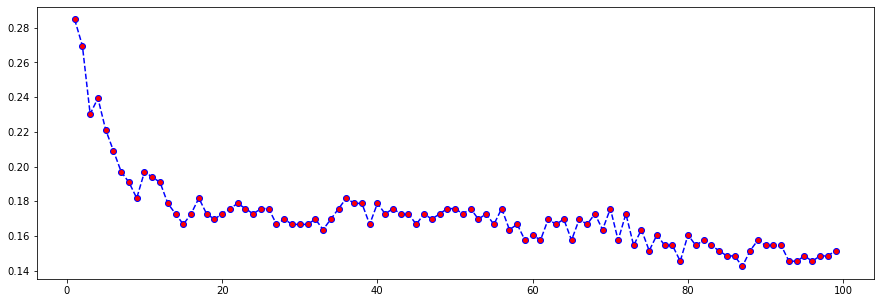

In [21]:
plt.figure(figsize=(15,5))
plt.plot(range(1,100),error_rate,color="blue",ls='--',marker='o',markerfacecolor='red')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [23]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       163
           1       0.86      0.80      0.83       167

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330

[[141  22]
 [ 33 134]]


____
## Conclusion

For k=30 our model seems to have a good fit